# Part 1 - Installation and Initial Setup

In [1]:
%%info

Let's install the necessary packages here

In [1]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1669741674108_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

In [122]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [2]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [101]:
import pandas as pd
import matplotlib.pyplot as plt 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

In [3]:
actors = spark.read.csv('name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Actors

In [7]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

In [4]:
actors.createOrReplaceTempView('Actors')
sqlactor1 = spark.sql(
'''
SELECT primaryName,birthYear,deathYear,knownForTitles
FROM Actors
LIMIT 5
'''
)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
sqlactor1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+

## Genres

In [103]:
genres.createOrReplaceTempView('Genres')
sqlgenres1 = spark.sql(
'''
SELECT titleType, primaryTitle, genres
FROM Genres
LIMIT 10
'''
)
sqlgenres1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+

In [12]:
genres.select('titleType').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

In [13]:
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Movie Actors

In [14]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [104]:
movie_actors.createOrReplaceTempView('Movie_Actors')
sqlmovie_actors = spark.sql(
'''
SELECT *
FROM Movie_Actors
LIMIT 10
'''
)
sqlmovie_actors.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

## Movie Ratings

In [17]:
movie_ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

In [105]:
movie_ratings.createOrReplaceTempView('Movie_Ratings')
sqlmovie_ratings = spark.sql(
'''
SELECT *
FROM Movie_Ratings
ORDER BY numVotes DESC
LIMIT 10
'''
)
sqlmovie_ratings.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt8860450|          6.3|    9991|
|tt2032572|          5.2|    9991|
|tt1739480|          6.9|     999|
|tt7681970|          5.3|     999|
|tt1077089|          7.3|     999|
+---------+-------------+--------+

## Overview of Data

In [20]:
print(f'Number of columns in Actors table: {len(actors.dtypes)}')
print(f'Number of rows in Actors table: {actors.count():,}')

print(f'Number of columns in Genres table: {len(genres.dtypes)}')
print(f'Number of rows in Genres table: {genres.count():,}')

print(f'Number of columns in Movie Actors table: {len(movie_actors.dtypes)}')
print(f'Number of rows in Movie Actors table: {movie_actors.count():,}')

print(f'Number of columns in Movie Ratings table: {len(movie_ratings.dtypes)}')
print(f'Number of rows in Movie Ratings table: {movie_ratings.count():,}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table: 6
Number of rows in Actors table: 9,706,922
Number of columns in Genres table: 9
Number of rows in Genres table: 6,321,302
Number of columns in Movie Actors table: 6
Number of rows in Movie Actors table: 36,468,817
Number of columns in Movie Ratings table: 3
Number of rows in Movie Ratings table: 993,153

# Part 2 - Analyzing Genres

In [7]:
sqlgenres2 = spark.sql(
'''
SELECT tconst, titleType, genres
FROM Genres
LIMIT 5
'''
)
sqlgenres2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+

In [4]:
from pyspark.sql.functions import *
genres1 = genres.withColumnRenamed("genre","genres").withColumn("genre",explode(split(col("genres"),'\\,'))).drop("genres")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
genres1.createOrReplaceTempView('Genres1')
sql_genres1 = spark.sql(
'''
SELECT tconst, titleType, genre
FROM Genres1
LIMIT 10
'''
)
sql_genres1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+

## Total Unique Genres

**What is the total number of unique genres available in the movie title type?**

In [24]:
print(str(genres1.select('genre').distinct().count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [56]:
sql_genres2 = spark.sql(
'''
SELECT DISTINCT genre
FROM Genres1
'''
)
sql_genres2.show(genres1.select('genre').distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|      Short|
|  Film-Noir|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

In [10]:
genres2 = genres1.filter(genres1.genre != '\\N')

genres2.createOrReplaceTempView('Genres2')
sql_genres2 = spark.sql(
'''
SELECT DISTINCT genre
FROM Genres2
'''
)
sql_genres2.show(genres2.select('genre').distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|      Short|
|  Film-Noir|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

# Top Genres by Movies

In [6]:
movie_and_genres  = genres2.join(movie_ratings,["tconst"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
movie_and_genres.createOrReplaceTempView('Movie_and_Genres')

In [78]:
sql_movie_and_genres = spark.sql(
'''
SELECT genre, averageRating
FROM Movie_and_Genres
WHERE titleType = 'movie'
'''
)
sql_movie_and_genres.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

In [84]:
sql_movie_and_genres_avg = spark.sql(
'''
SELECT genre, AVG(CAST(averageRating AS double))AS avg_rating
FROM Movie_and_Genres
WHERE titleType = 'movie'
GROUP BY genre
'''
)
sql_movie_and_genres_avg.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|      genre|        avg_rating|
+-----------+------------------+
|    Mystery|5.9404375359815775|
|    Musical|  6.20324605451937|
|     Action|  5.71873406966865|
|      Sport| 6.600145190562612|
|  Talk-Show|               5.8|
|    Romance| 6.125714180397362|
|   Thriller| 5.625967566447333|
| Reality-TV| 6.379310344827587|
|     Family| 6.250560452715203|
|    Fantasy| 5.924820762833382|
|    History| 6.822718115605145|
|  Animation| 6.326203750633553|
|  Film-Noir| 6.636246786632391|
|      Short|              7.26|
|     Sci-Fi| 5.325150008571918|
|       News|7.2009160305343505|
|      Drama| 6.288080210387901|
|Documentary| 7.245469798657718|
|    Western| 5.948970989337962|
|     Comedy| 5.941363108004129|
+-----------+------------------+
only showing top 20 rows

In [86]:
sql_top_genres = spark.sql(
'''
SELECT genre, AVG(averageRating) AS avg_rating
FROM Movie_and_Genres
WHERE titleType = 'movie'
GROUP BY genre
ORDER BY avg_rating DESC
'''
)
sql_top_genres.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|      genre|        avg_rating|
+-----------+------------------+
|      Short| 7.260000000000001|
|Documentary|7.2454697986577195|
|       News|7.2009160305343505|
|  Biography| 6.983637640449438|
|  Game-Show|             6.975|
|    History| 6.822718115605146|
|      Music|6.7520202020202005|
|  Film-Noir| 6.636246786632392|
|      Sport| 6.600145190562612|
|        War|  6.48380703066567|
| Reality-TV| 6.379310344827586|
|  Animation| 6.326203750633555|
|      Drama| 6.288080210387901|
|     Family|6.2505604527152006|
|    Musical| 6.203246054519368|
|    Romance| 6.125714180397363|
|      Crime| 6.026013332684541|
|    Western| 5.948970989337961|
|     Comedy| 5.941363108004129|
|    Mystery| 5.940437535981577|
+-----------+------------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

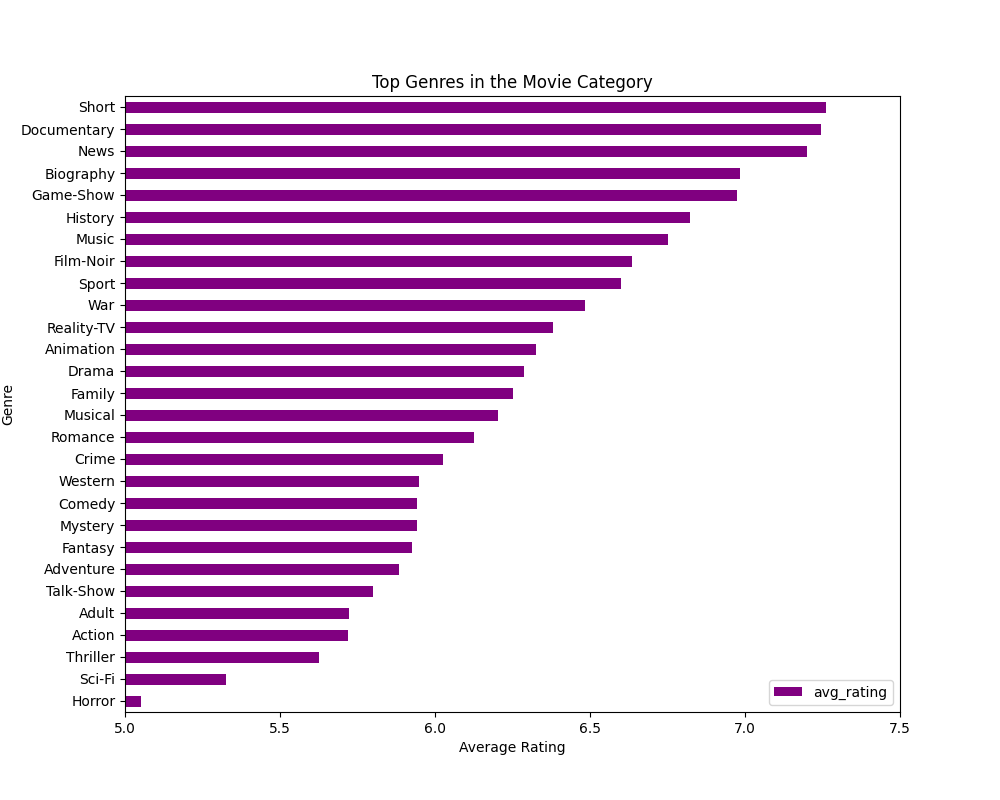

In [90]:
sql_top_genres.toPandas().set_index("genre").plot(kind="barh", figsize = (10,8),color = "purple")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Top Genres in the Movie Category")

ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim([5.0,7.5])

%matplot plt

# Part 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [96]:
movie_actors.createOrReplaceTempView('Job_Categories')
sql_job = spark.sql(
'''
SELECT tconst, category
FROM Job_Categories
'''
)
sql_job.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [91]:
print(str(movie_actors.select('category').distinct().count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [93]:
sql_job_unique = spark.sql(
'''
SELECT DISTINCT category
FROM Job_Categories
'''
)
sql_job_unique.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

# Top Job Categories

In [97]:
sql_job_count = spark.sql(
'''
SELECT category, count(tconst) as count
FROM Job_Categories
GROUP BY category
'''
)
sql_job_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

In [98]:
sql_job_top = spark.sql(
'''
SELECT category, count(tconst) as count
FROM Job_Categories
GROUP BY category
ORDER BY count DESC
'''
)
sql_job_top.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

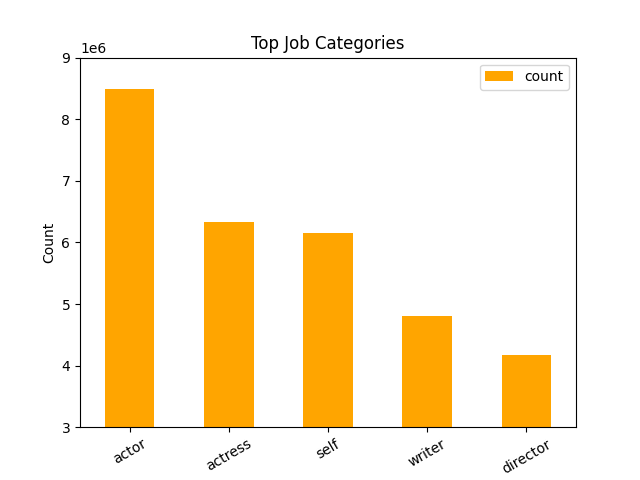

In [99]:
ax = sql_job_top.toPandas().set_index("category").nlargest(5,"count").plot(kind="bar", color = "orange")
ax.set_ylabel("Count")
plt.title("Top Job Categories")
plt.xticks(rotation=30)

ax.set_ylim([3000000,9000000])

%matplot plt

# Part 4

In [27]:
actor_movie_actors = actors.join(movie_actors,["nconst"])

genres_actor_movies = genres.join(actor_movie_actors,["tconst"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
genres_actor_movies.createOrReplaceTempView('Actor_Titles')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 1) Find all the "movies" "acted" by both "Johnny Depp" and "Helena Bonham Carter".

In [23]:
sql_j_h = spark.sql(
'''
SELECT DISTINCT primaryTitle
FROM Actor_Titles 
WHERE titletype = 'movie' AND category IN ('actor', 'actress') AND primaryName IN ('Johnny Depp', 'Helena Bonham Carter')
GROUP BY primaryTitle
HAVING COUNT(primaryTitle) > 1
'''
)
sql_j_h.show(truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Corpse Bride                                  |
|Dark Shadows                                  |
|Charlie and the Chocolate Factory             |
|Alice Through the Looking Glass               |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice in Wonderland                           |
+----------------------------------------------+

## 2) Find all the "movies" "acted" by "Brad Pitt" after 2010.

In [29]:
sql_bp1 = spark.sql(
'''
SELECT primaryTitle, startYear
FROM Actor_Titles 
WHERE titletype = 'movie' AND category = 'actor' AND primaryName = 'Brad Pitt' AND startYear > 2010
'''
)
sql_bp1.show(truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|The Tree of Life                 |2011     |
|World War Z                      |2013     |
|12 Years a Slave                 |2013     |
|The Big Short                    |2015     |
|Fury                             |2014     |
|Moneyball                        |2011     |
|Killing Them Softly              |2012     |
|Ad Astra                         |2019     |
|By the Sea                       |2015     |
|Allied                           |2016     |
|War Machine                      |2017     |
|Once Upon a Time ... in Hollywood|2019     |
+---------------------------------+---------+

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [45]:
sql_zen = spark.sql(
'''
SELECT startYear, count(primaryTitle) as count
FROM Actor_Titles 
WHERE titletype = 'movie' AND category = 'actress' AND primaryName = 'Zendaya' AND NOT startYear = '\\\\N'
GROUP BY startYear
'''
)
sql_zen.show(truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|2020     |1    |
|2018     |2    |
|2017     |1    |
+---------+-----+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [74]:
title_rating = genres.join(movie_ratings,["tconst"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [76]:
title_rating = title_rating.withColumn("averageRating",col("averageRating").cast("float"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [78]:
title_rating.createOrReplaceTempView('Title_Rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [80]:
sql_rating = spark.sql(
'''
SELECT primaryTitle, averageRating
FROM Title_Rating
WHERE titletype = 'movie' AND startYear = '2019' AND averageRating > '9.7' 
ORDER BY averageRating DESC
'''
)
sql_rating.show(truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|primaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|A Grunt's Life                                   |10.0         |
|The Butcher Baronet                              |10.0         |
|Our Scripted Life                                |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|A Medicine for the Mind                          |10.0         |
|L'Enfant Terrible                                |10.0         |
|Love in Kilnerry                                 |10.0         |
|Kirket                                           |10.0         |
|Superhombre                                      |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|The Cardinal                                     |9.9          |
|Square On

# Extra Credit

### Analyzing Title Types

What are the different title types?

In [108]:
title_type_unique = spark.sql(
'''
SELECT DISTINCT titleType
FROM Movie_and_Genres
'''
)
title_type_unique.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

In [112]:
print(str(movie_and_genres.select('titleType').distinct().count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

10

Top Title Types

In [113]:
title_type_count = spark.sql(
'''
SELECT titleType, count(tconst) as count
FROM Movie_and_Genres
GROUP BY titleType
ORDER BY count DESC
'''
)
title_type_count.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------+
|   titleType| count|
+------------+------+
|   tvEpisode|965595|
|       movie|403394|
|       short|249918|
|    tvSeries| 99651|
|       video| 89655|
|     tvMovie| 62544|
|   videoGame| 18918|
|tvMiniSeries| 14430|
|   tvSpecial| 10418|
|     tvShort|  6899|
+------------+------+

Best Title Type

In [115]:
title_type_rating = spark.sql(
'''
SELECT titleType, count(tconst) as count, AVG(averageRating) as avg_rating
FROM Movie_and_Genres
GROUP BY titleType
ORDER BY avg_rating DESC
'''
)
title_type_rating.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------+------------------+
|   titleType| count|        avg_rating|
+------------+------+------------------+
|   tvEpisode|965595| 7.356012510421039|
|   videoGame| 18918|  7.31306163442224|
|tvMiniSeries| 14430| 7.156368676368676|
|     tvShort|  6899| 6.902232207566313|
|   tvSpecial| 10418| 6.842743328853906|
|       short|249918| 6.839272481373894|
|    tvSeries| 99651| 6.803586516944131|
|       video| 89655| 6.588878478612454|
|     tvMovie| 62544|6.5606501023279655|
|       movie|403394|6.1515163834861255|
+------------+------+------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

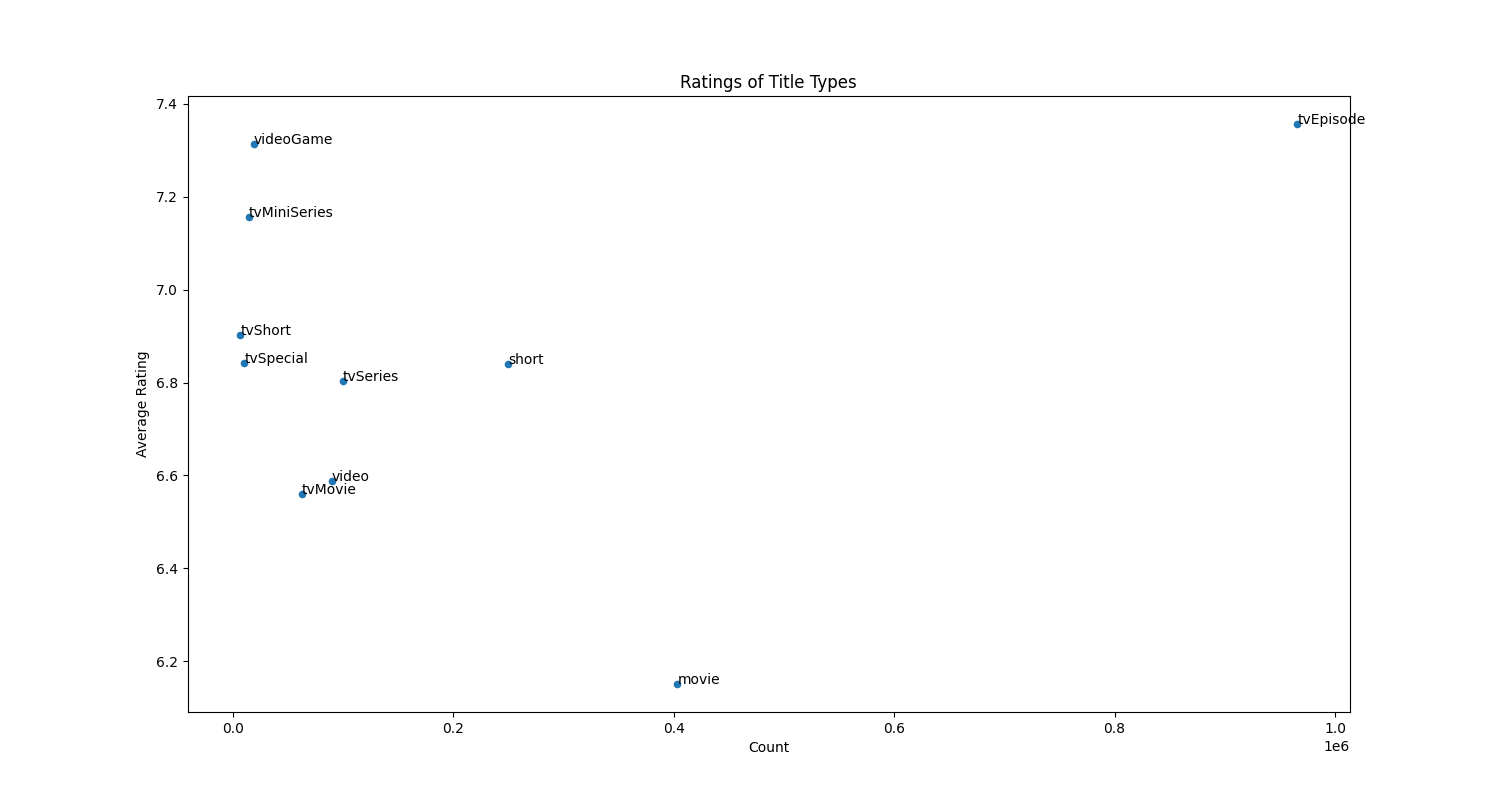

In [140]:
title_type_df = title_type_rating.toPandas()

ax = title_type_df.set_index("titleType").plot(kind="scatter", x = "count", y= "avg_rating", figsize = (15,8))
plt.xlabel("Count")
plt.ylabel("Average Rating")
plt.title("Ratings of Title Types")
title_type_df[['count','avg_rating','titleType']].apply(lambda x: ax.text(*x),axis=1)
%matplot plt